In [3]:
import pandas as pd
import numpy  as np

In [4]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [6]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Media de Vótos em filmes no TMDB 5000')

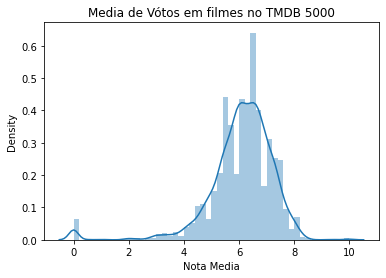

In [7]:
ax = sns.distplot(tmdb.vote_average)
ax.set(xlabel = 'Nota Media', ylabel = 'Density')
ax.set_title('Media de Vótos em filmes no TMDB 5000')

Text(0.5, 1.0, 'Media de Vótos em filmes no TMDB 5000')

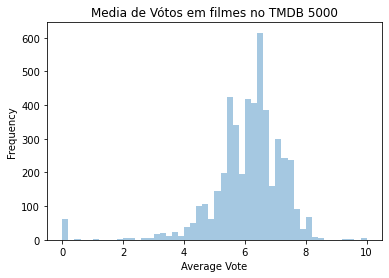

In [8]:
ax = sns.distplot(tmdb.vote_average, norm_hist = False, kde = False)
ax.set(xlabel = 'Average Vote', ylabel = 'Frequency')
ax.set_title('Media de Vótos em filmes no TMDB 5000')

Text(0.5, 1.0, 'Distribuição de Notas Médias dos filmes')

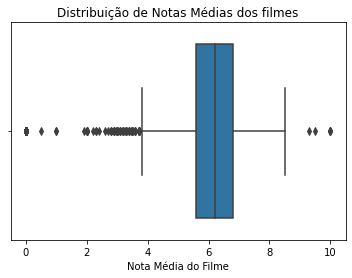

In [9]:
ax = sns.boxplot(tmdb.vote_average, orient = 'h')
ax.set(xlabel = 'Nota Média do Filme')
ax.set_title('Distribuição de Notas Médias dos filmes')

Não faz sentido filmes cuja nota média é 0 ou 10

In [10]:
tmdb.query('vote_average == 0')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 37, ""nam...",NaN,69382,[],en,The Legend of God's Gun,A gun-slinging preacher returns to the debauch...,0.003582,[],[],2007-07-08,0,78.0,[],Released,NaN,The Legend of God's Gun,0.0,0
4771,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,220490,[],en,Her Cry: La Llorona Investigation,"Crew of ""Paranormal Legends"" went to film thei...",0.056459,[],[],2013-04-19,0,89.0,[],Released,NaN,Her Cry: La Llorona Investigation,0.0,0
4780,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,366967,[],en,Dutch Kills,A desperate ex-con is forced to gather his old...,0.038143,[],[],2015-10-02,0,90.0,[],Released,NaN,Dutch Kills,0.0,0
4785,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,287625,[],en,Stories of Our Lives,Created by the members of a Nairobi-based arts...,0.327794,[],"[{""iso_3166_1"": ""KE"", ""name"": ""Kenya""}]",2014-09-05,0,60.0,"[{""iso_639_1"": ""sw"", ""name"": ""Kiswahili""}, {""i...",Released,NaN,Stories of Our Lives,0.0,0


Detectamos que filmes tiveram poucos ou nenhum voto... Decidimos retirar esses filmes

In [11]:
tmdb_10 = tmdb.query('vote_count >= 10')
tmdb_10.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Text(0.5, 1.0, 'Media de Vótos em filmes com 10 ou mais votos no TMDB 5000')

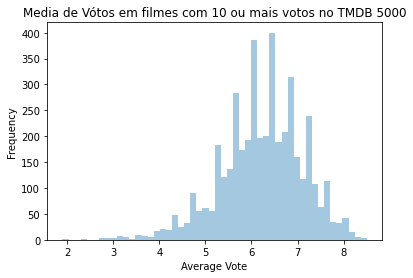

In [12]:
ax = sns.distplot(tmdb_10.vote_average, norm_hist = False, kde = False)
ax.set(xlabel = 'Average Vote', ylabel = 'Frequency')
ax.set_title('Media de Vótos em filmes com 10 ou mais votos no TMDB 5000')

Text(0.5, 1.0, 'Media de Vótos em filmes com 10 ou mais votos no TMDB 5000')

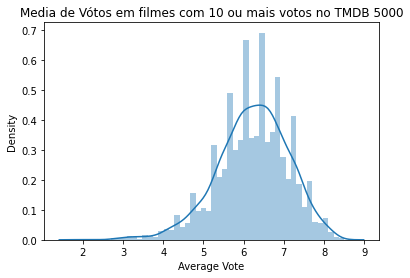

In [13]:
ax = sns.distplot(tmdb_10.vote_average)
ax.set(xlabel = 'Average Vote', ylabel = 'Density')
ax.set_title('Media de Vótos em filmes com 10 ou mais votos no TMDB 5000')

Text(0.5, 1.0, 'Media de Vótos em filmes com 10 ou mais votos no TMDB 5000')

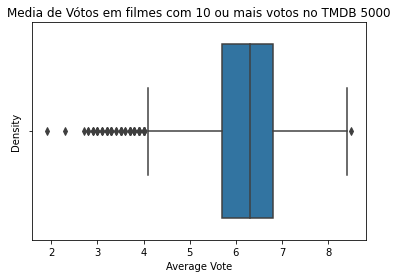

In [14]:
ax = sns.boxplot(tmdb_10.vote_average)
ax.set(xlabel = 'Average Vote', ylabel = 'Density')
ax.set_title('Media de Vótos em filmes com 10 ou mais votos no TMDB 5000')

#Analisando o Movie Lens

In [15]:
notas = pd.read_csv('ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
nota_media_filme = notas.groupby('movieId').mean()['rating']
nota_media_filme

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

Text(0.5, 1.0, 'Media de Vótos em filmes no Movie Lens 100k')

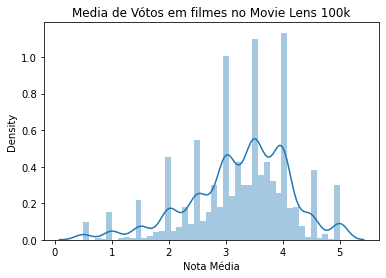

In [17]:
ax = sns.distplot(nota_media_filme.values)
ax.set(xlabel = 'Nota Média', ylabel = 'Density')
ax.set_title('Media de Vótos em filmes no Movie Lens 100k')

In [18]:
quantidade_filme = notas.groupby('movieId').count()
filmes_10 = quantidade_filme.query('rating >= 10').index
filmes_10

Int64Index([     1,      2,      3,      5,      6,      7,      9,     10,
                11,     12,
            ...
            166461, 166528, 166643, 168250, 168252, 174055, 176371, 177765,
            179819, 187593],
           dtype='int64', name='movieId', length=2269)

In [19]:
nota_media_10 = nota_media_filme.loc[filmes_10]
nota_media_10

movieId
1         3.920930
2         3.431818
3         3.259615
5         3.071429
6         3.946078
            ...   
174055    3.423077
176371    3.805556
177765    3.538462
179819    3.125000
187593    3.875000
Name: rating, Length: 2269, dtype: float64

Text(0.5, 1.0, 'Media de Vótos em filmes com pelo menos 10 votos no Movie Lens 100k')

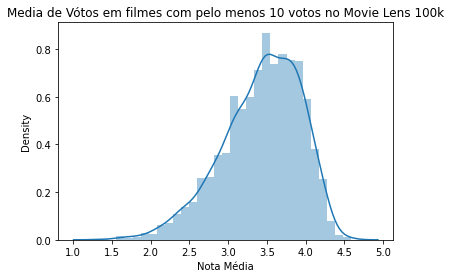

In [20]:
ax = sns.distplot(nota_media_10.values)
ax.set(xlabel = 'Nota Média', ylabel = 'Density')
ax.set_title('Media de Vótos em filmes com pelo menos 10 votos no Movie Lens 100k')

Text(0.5, 1.0, 'Media de Vótos em filmes com pelo menos 10 votos no Movie Lens 100k')

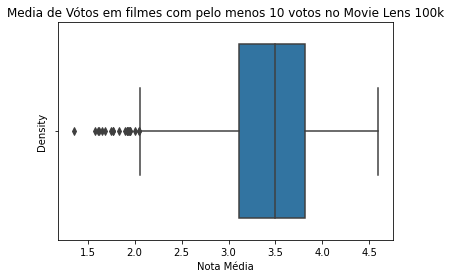

In [21]:
ax = sns.boxplot(nota_media_10.values)
ax.set(xlabel = 'Nota Média', ylabel = 'Density')
ax.set_title('Media de Vótos em filmes com pelo menos 10 votos no Movie Lens 100k')

Text(0.5, 1.0, 'Media de Vótos em filmes com pelo menos 10 votos no Movie Lens 100k')

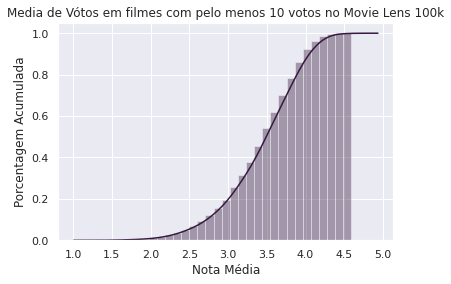

In [22]:
sns.set(style = 'darkgrid', palette = 'rocket')
ax = sns.distplot(nota_media_10.values, hist_kws = {'cumulative':True},
                  kde_kws = {'cumulative':True})
ax.set(xlabel = 'Nota Média', ylabel = 'Porcentagem Acumulada')
ax.set_title('Media de Vótos em filmes com pelo menos 10 votos no Movie Lens 100k')

Text(0.5, 1.0, 'Media de Vótos em filmes com pelo menos 10 votos no TMDB 5000')

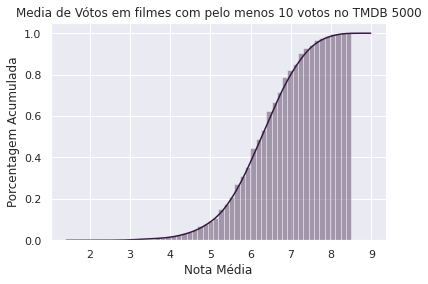

In [23]:
ax = sns.distplot(tmdb_10.vote_average,
                  hist_kws = {'cumulative':True},
                  kde_kws = {'cumulative':True})
ax.set(xlabel = 'Nota Média', ylabel = 'Porcentagem Acumulada')
ax.set_title('Media de Vótos em filmes com pelo menos 10 votos no TMDB 5000')

#Analisando a distribuição de outros campos TMDB

In [24]:
tmdb_10.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [25]:
tmdb.vote_count

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4798      238
4799        5
4800        6
4801        7
4802       16
Name: vote_count, Length: 4803, dtype: int64

Text(0.5, 1.0, 'Número de votos de Vótos em filmes com pelo menos 10 votos no tmdb 5000')

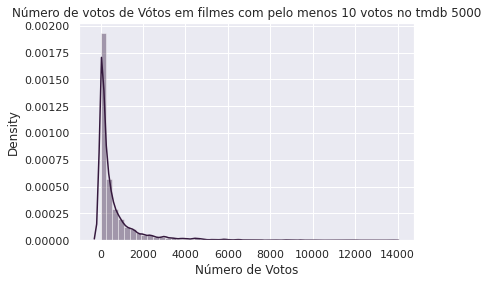

In [26]:
ax = sns.distplot(tmdb.vote_count)
ax.set(xlabel = 'Número de Votos', ylabel = 'Density')
ax.set_title('Número de votos de Vótos em filmes com pelo menos 10 votos no tmdb 5000')

Text(0.5, 1.0, 'Valor gasto em filmes com pelo menos 10 votos no tmdb 5000')

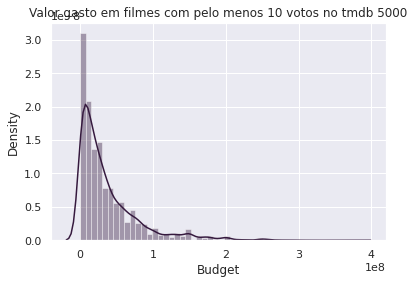

In [27]:
ax = sns.distplot(tmdb.query('budget > 0').budget)
ax.set(xlabel = 'Budget', ylabel = 'Density')
ax.set_title('Valor gasto em filmes com pelo menos 10 votos no tmdb 5000')

In [28]:
tmdb.popularity

0       150.437577
1       139.082615
2       107.376788
3       112.312950
4        43.926995
           ...    
4798     14.269792
4799      0.642552
4800      1.444476
4801      0.857008
4802      1.929883
Name: popularity, Length: 4803, dtype: float64

In [29]:
tmdb.query('popularity == 0')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


Text(0.5, 1.0, 'Popularidade em filmes com pelo menos 10 votos no tmdb 5000')

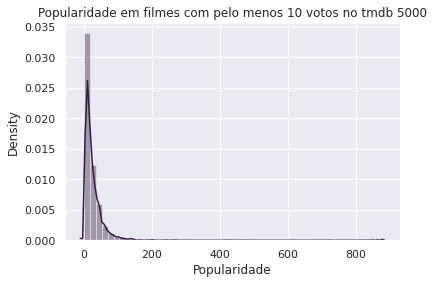

In [30]:
ax = sns.distplot(tmdb.popularity)
ax.set(xlabel = 'Popularidade', ylabel = 'Density')
ax.set_title('Popularidade em filmes com pelo menos 10 votos no tmdb 5000')

In [31]:
tmdb.runtime.isnull().sum()

2

In [32]:
tmdb.runtime.dropna()

0       162.0
1       169.0
2       148.0
3       165.0
4       132.0
        ...  
4798     81.0
4799     85.0
4800    120.0
4801     98.0
4802     90.0
Name: runtime, Length: 4801, dtype: float64

Text(0.5, 1.0, 'Tempo de duração em filmes com pelo menos 10 votos no tmdb 5000')

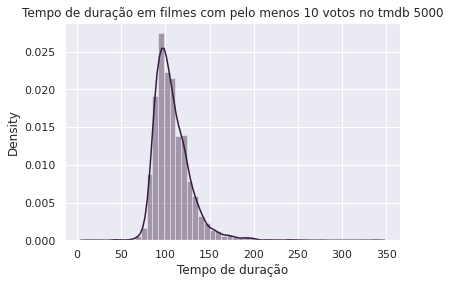

In [33]:
ax = sns.distplot(tmdb.query('runtime > 0').runtime)
ax.set(xlabel = 'Tempo de duração', ylabel = 'Density')
ax.set_title('Tempo de duração em filmes com pelo menos 10 votos no tmdb 5000')

In [34]:
tmdb.query('runtime == 0')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1011,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,53953,"[{""id"": 10292, ""name"": ""gore""}, {""id"": 12339, ...",de,The Tooth Fairy,A woman and her daughter (Nicole Muñoz) encoun...,0.716764,[],[],2006-08-08,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,The Tooth Fairy,4.3,13
3112,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,41894,[],en,Blood Done Sign My Name,A drama based on the true story in which a bla...,0.397341,[],[],2010-02-01,0,0.0,[],Released,No one changes the world alone.,Blood Done Sign My Name,6.0,5
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3809,4000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,158150,[],en,How to Fall in Love,"An accountant, who never quite grew out of his...",1.923514,"[{""name"": ""Annuit Coeptis Entertainment Inc."",...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-21,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,How to Fall in Love,5.2,20
3953,0,"[{""id"": 10752, ""name"": ""War""}, {""id"": 18, ""nam...",NaN,281230,"[{""id"": 187056, ""name"": ""woman director""}]",en,Fort McCoy,Unable to serve in World War II because of a h...,0.384496,[],[],2014-01-01,0,0.0,[],Released,NaN,Fort McCoy,6.3,2
3992,0,[],NaN,346081,[],en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.296981,[],"[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",2015-06-26,0,0.0,[],Released,NaN,Sardaarji,9.5,2
4068,0,[],NaN,371085,[],en,Sharkskin,The Post War II story of Manhattan born Mike E...,0.027801,[],[],2015-01-01,0,0.0,[],Released,NaN,Sharkskin,0.0,0
4118,0,[],NaN,325140,[],en,Hum To Mohabbat Karega,"Raju, a waiter, is in love with the famous TV ...",0.001186,[],[],2000-05-26,0,0.0,[],Released,NaN,Hum To Mohabbat Karega,0.0,0
4205,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",http://www.imdb.com/title/tt1289419/,66468,[],en,N-Secure,N-Secure is a no holds-barred thrilling drama ...,0.134560,[],[],2010-10-15,2592808,0.0,[],Released,NaN,N-Secure,4.3,4
4210,0,"[{""id"": 10749, ""name"": ""Romance""}]",NaN,74084,[],hi,दिल जो भी कहे,"During the British rule in India, several Indi...",0.122704,"[{""name"": ""Entertainment One Pvt. Ltd."", ""id"":...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",2006-12-07,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Dil Jo Bhi Kahey...,0.0,0


Text(0.5, 1.0, 'Tempo de duração em filmes com pelo menos 10 votos no tmdb 5000')

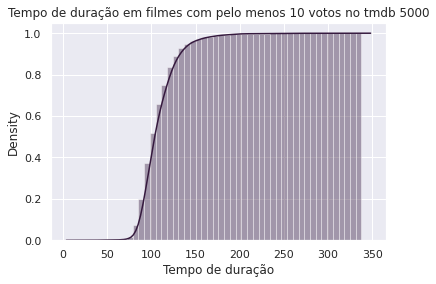

In [35]:
ax = sns.distplot(tmdb.query('runtime > 0').runtime,
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True})
ax.set(xlabel = 'Tempo de duração', ylabel = 'Density')
ax.set_title('Tempo de duração em filmes com pelo menos 10 votos no tmdb 5000')

In [36]:
tmdb.query('runtime > 0').runtime.quantile(0.8)

121.0

#Analisando movie lens media dos filmes com pelo menos 10 votos

In [37]:
nota_media_10.mean()

3.4320503405352603

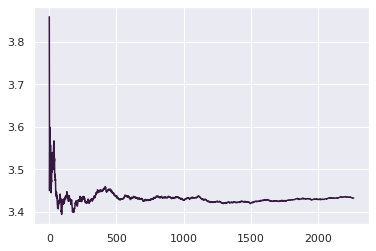

In [38]:
import numpy as np

medias = list()

np.random.seed(75243)
temp = nota_media_10.sample(frac = 1)

medias = pd.Series([temp[0:i].mean() for i in range(1, len(temp))])

medias = pd.Series(medias)

sns.lineplot(medias.index, medias.values)

In [39]:
from statsmodels.stats.weightstats import zconfint

zconfint(nota_media_10)

(3.4112459477469557, 3.452854733323563)

In [40]:
from statsmodels.stats.weightstats import DescrStatsW

descr_10 = DescrStatsW(nota_media_10)
descr_10.tconfint_mean()

(3.411234839229381, 3.4528658418411395)

#Analisando filme 1

In [41]:
filmes = pd.read_csv('movies.csv')

filmes.query('movieId == 1')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [42]:
notas_1 = notas.query('movieId == 1')
notas_1

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


Text(0.5, 1.0, 'Nota para Toy Story')

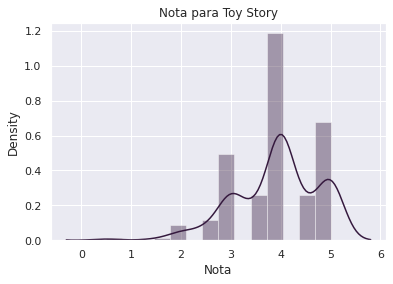

In [43]:
ax = sns.distplot(notas_1.rating)
ax.set(xlabel = 'Nota', ylabel = 'Density')
ax.set_title('Nota para Toy Story')

Text(0.5, 1.0, 'Nota para Toy Story')

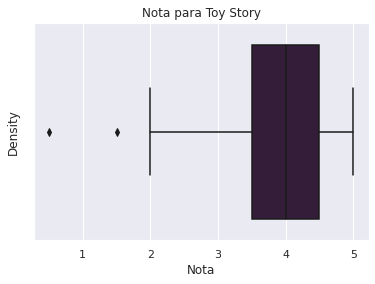

In [44]:
ax = sns.boxplot(notas_1.rating)
ax.set(xlabel = 'Nota', ylabel = 'Density')
ax.set_title('Nota para Toy Story')

In [45]:
notas_1.rating.mean()

3.9209302325581397

In [46]:
notas_1.rating.count()

215

In [47]:
zconfint(notas_1.rating)

(3.8093359183563402, 4.032524546759939)

In [48]:
from statsmodels.stats.weightstats import ztest

ztest(notas_1.rating, value = 3.432050340535)

(8.586342305921287, 8.97819040152995e-18)

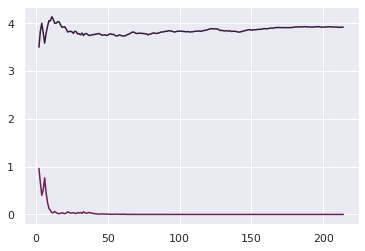

In [49]:
medias = list()

np.random.seed(752)
temp = notas_1.sample(frac = 1).rating

def calcula_teste(i):
  media = temp[0:i].mean()
  stat, p = ztest(temp[0:i], value = 3.4320503405)

  return (i, media, p)

medias = np.array([calcula_teste(i) for i in range(2, len(temp))])

medias

sns.lineplot(medias[:, 0], medias[:, 1])
sns.lineplot(medias[:, 0], medias[:, 2])

# Comparação de duas amostras

In [50]:
print(ztest(notas_1.rating, notas.rating))
zconfint(notas_1.rating, notas.rating)

(5.894327101501841, 3.762112778881965e-09)


(0.2799245129192442, 0.5588219849631111)

In [51]:
from scipy.stats import ttest_ind

ttest_ind(notas_1.rating, notas.rating)

Ttest_indResult(statistic=5.894327101501841, pvalue=3.774003138720876e-09)

In [52]:
descr_todas = DescrStatsW(notas.rating)
desc_toys = DescrStatsW(notas_1.rating)
comparacao = descr_todas.get_compare(desc_toys)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


{'boxes': [<matplotlib.lines.Line2D at 0x7f929b062160>,
 'caps': [<matplotlib.lines.Line2D at 0x7f929b062be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9298dae748>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9298dae390>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f929b062470>,
  <matplotlib.lines.Line2D at 0x7f9298db72b0>]}

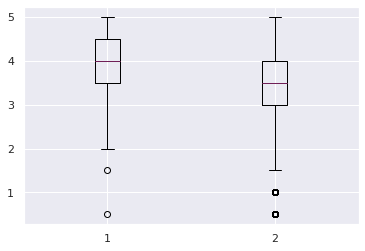

In [54]:
import matplotlib.pyplot as plt

plt.boxplot([notas_1.rating, notas.rating])

In [55]:
descr_todas = DescrStatsW(notas.rating)
desc_toys = DescrStatsW(notas_1.rating[3:12])
comparacao = descr_todas.get_compare(desc_toys)
comparacao.summary(use_t = True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0540,0.348,-0.155,0.877,-0.735,0.627


# Comparar a media de dois filmes

In [56]:
filmes.query('movieId in [1, 593, 72226]')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


{'boxes': [<matplotlib.lines.Line2D at 0x7f9290ea12e8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9290ea1d68>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9290eb18d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9290eb1518>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9290ea15f8>,
  <matplotlib.lines.Line2D at 0x7f9290e45e80>]}

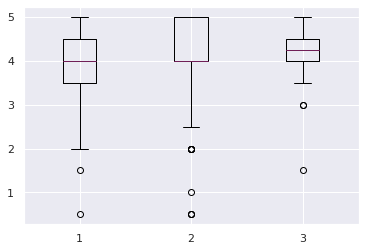

In [57]:
notas_593 = notas.query('movieId == 593')
notas_72226 = notas.query('movieId == 72226')

plt.boxplot([notas_1.rating, notas_593.rating, notas_72226.rating])


In [58]:
notas_72226.describe()

,userId,movieId,rating,timestamp
count,18.000000,18.0,18.000000,1.800000e+01
mean,329.722222,72226.0,4.083333,1.395218e+09
std,174.748157,0.0,0.895249,9.459862e+07
min,73.000000,72226.0,1.500000,1.262899e+09
25%,167.000000,72226.0,4.000000,1.279706e+09
50%,326.000000,72226.0,4.250000,1.441777e+09
75%,466.250000,72226.0,4.500000,1.471770e+09
max,610.000000,72226.0,5.000000,1.498522e+09


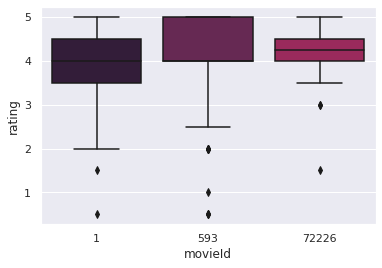

In [63]:
sns.boxplot(x = 'movieId', y = 'rating', data = notas.query('movieId in (1, 593, 72226)'))

In [71]:
notas.query('movieId in (1, 593, 72226)').groupby('movieId').count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
593,279,279,279
72226,18,18,18


In [66]:
descr_1 = DescrStatsW(notas_1.rating)
desc_593 = DescrStatsW(notas_593.rating)
comparacao = descr_1.get_compare(desc_593)
comparacao.summary(use_t = True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.2404,0.077,-3.132,0.002,-0.391,-0.090


In [67]:
descr_593 = DescrStatsW(notas_593.rating)
desc_72226 = DescrStatsW(notas_72226.rating)
comparacao = descr_593.get_compare(desc_72226)
comparacao.summary(use_t = True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.0780,0.208,0.374,0.708,-0.332,0.488


In [68]:
comparacao = descr_1.get_compare(desc_72226)
comparacao.summary(use_t = True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.1624,0.206,-0.788,0.431,-0.568,0.243


In [73]:
from scipy.stats import normaltest, ranksums

normaltest(notas_1.rating)

NormaltestResult(statistic=18.220369223286593, pvalue=0.00011053430732728716)

In [74]:
ranksums(notas_1.rating, notas_593.rating)

RanksumsResult(statistic=-3.5930962013771377, pvalue=0.0003267718756440693)